<h1><font color="red">Car register card generator</font></h1>

### Installing dependencies

In [183]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install arabic_reshaper

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


### Importing libraries

In [248]:
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageEnhance, ImageOps
from random import randint
import random

### Reading the data

In [255]:
df = pd.read_excel(r'C:\Users\ASUS\Downloads\PI.xlsx')

In [256]:
df

,numImmatriculation,numV,typeCommercial,Constructeur,nSerie,typeConstructeur,refF,nom et prenom,adresse,cin,...,energie,puissanceF,PV,nbE,charge,nbPlace,nbD,cylindré,Unnamed: 24,Unnamed: 25
0,100,9761,NaN,FORD,KPA15HXHZLO145289,IHA5L145,1 ف,صوة أشرف,الشابة المهدية,11827636,...,بنزين,5 خ خ,1.123 طن,NaN,0.427 طن,5,NaN,3 صم,NaN,NaN
1,101,1786,RIO,KIA,BHCD2569SQOI547,LSDG245K,2 ف,الجليلي أبان,رواد أريانة,11800502,...,بنزين,7 خ خ,1.100 طن,NaN,0.578 طن,5,NaN,6 صم,NaN,NaN
2,102,7896,CLIO,RENAULT,LOSEMP647PI93T4,OZEYT30H,3 ف,حمدان أبسل,تستور باجة,11850603,...,بنزين,5 خ خ,1.204 طن,NaN,0.265 طن,5,NaN,4 صم,NaN,NaN
3,103,6941,DMAX 2P,USUZU,KQ54ZF9S6A3F214AZ,HSS54521,4 ف,العظمة أبلج,منزل بورقيبة بنزرت,11226573,...,بنزين,9 خ خ,1.075 طن,NaN,0.678 طن,5,NaN,8 صم,NaN,NaN
4,104,4782,C3,CITROEN,KAZE24G6S9J1U0LO6,B2ET3U41,5 ف,العافية أبو بكر,المحمدية بن عروس,11548796,...,بنزين,10 خ خ,0.978 طن,NaN,0.542 طن,5,NaN,5 صم,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,245,5710,A4,AUDI,WAUZZZ8VDFFA04785676,V8AAP8GZ,146 ف,عصام تركي,قرمبالية نابل,21808035,...,NaN,3 خ خ,1.077 طن,NaN,0.483 طن,5,NaN,5 صم,NaN,NaN
146,246,8302,NaN,ISUZU,JAARB65F87F76765,RB65FZZA,147 ف,حبيبة زريبي,الكرم تونس,27437640,...,NaN,4 خ خ,0.954 طن,NaN,0.483 طن,6,NaN,5 صم,NaN,NaN
147,247,461,GOLF4,VOLKSWAGEN,WVWZZZBD1561ERGEG,ZEAZAE,148 ف,شادية عياري,الوردانين سوسة,29395541,...,NaN,8 خ خ,1.127 طن,NaN,0.783 طن,7,NaN,4 صم,NaN,NaN
148,248,1465,PASSAT,VOLKSWAGEN,WVWZZZBSDFESF1541,BG56RZ,149 ف,شيماء عياري,بنقردان مدنين,21673039,...,NaN,5 خ خ,1.067 طن,NaN,0.684 طن,7,NaN,5 صم,NaN,NaN


In [257]:
records = df.to_dict(orient='record')

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


### Importing the font for the arabic writing

In [280]:
font = ImageFont.truetype(r"C:\Users\ASUS\Downloads\font\Janna LT Bold\Janna LT Bold.ttf", size=20)
font1 = ImageFont.truetype(r"C:\Users\ASUS\Downloads\font\Janna LT Bold\Janna LT Bold.ttf", size=30)

### Reading the template for the ID card

In [281]:
templateF = Image.open(r'C:\Users\ASUS\Desktop\ID script\cgtempF.jpg')
templateB = Image.open(r'C:\Users\ASUS\Desktop\ID script\cgtempB.jpg')

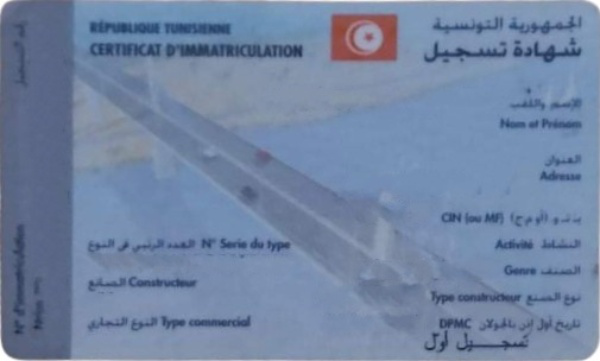

In [282]:
templateF

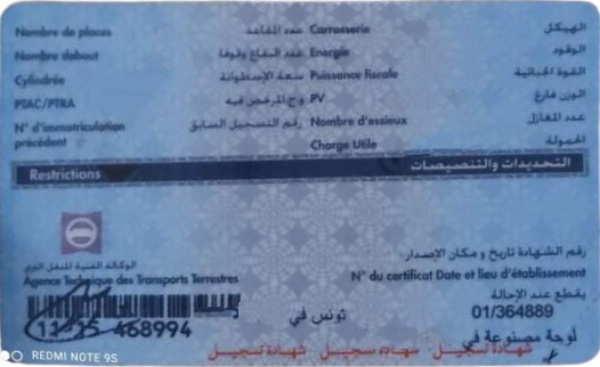

In [283]:
templateB

### The function that will generate the ID card from the data and will reshape the arabic words

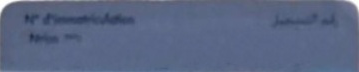

In [284]:
tmp = Image.open(r'C:\Users\ASUS\Downloads\tmp.jpg')
img = tmp.rotate(-90, expand=1)
img

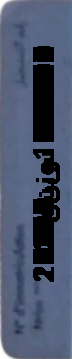

In [290]:
for record in records:
    draw = ImageDraw.Draw(img)
    draw.text((288, 54), str(record['numV']),anchor='rs',font=font1, fill='black' )
    draw.text((210, 54), get_display(arabic_reshaper.reshape("تونس")),anchor='rs',font=font1, fill='black' )
    draw.text((130, 54), str(record['numImmatriculation ']),anchor='rs',font=font1, fill='black' )
img    
img1 = img.rotate(90, expand=1)
img1

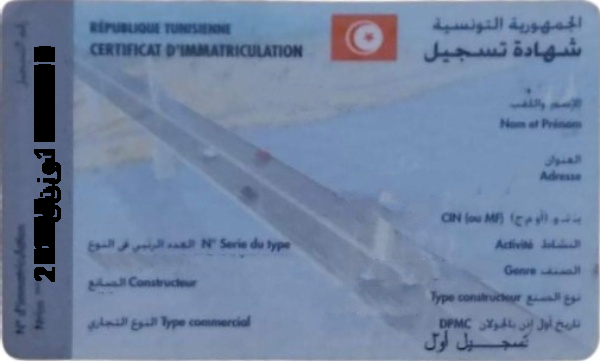

In [296]:
templateF = Image.open(r'C:\Users\ASUS\Desktop\ID script\cgtempF.jpg')
templateF.paste(img1,(1, 0))
#Image.Image.paste(templateF, img1, (50, 125))
templateF

In [300]:
def generate_cardF(data):
    templateF = Image.open(r'C:\Users\ASUS\Desktop\ID script\cgtempF.jpg')
    #pic = Image.open(f"photos/{data['id']}.jpg").resize((165, 190), Image.ANTIALIAS)
    #template.paste(pic, (25, 75, 190, 265))
    draw = ImageDraw.Draw(templateF)
    draw.text((430, 224), str(data['cin']),anchor='rs',font=font, fill='black')
    draw.text((426, 329), str(data['DPMC']),anchor='rs',font=font, fill='black')
    draw.text((88, 348), str(data['typeCommercial']),anchor='ls',font=font, fill='black')
    draw.text((498, 108), get_display(arabic_reshaper.reshape(data["nom et prenom"])),anchor='rs', font=font,fill='black')
    draw.text((498, 187), get_display(arabic_reshaper.reshape(data['adresse'])),anchor='rs',font=font, fill='black')
    draw.text((489, 277), get_display(arabic_reshaper.reshape(data['genre'])),anchor='rs', font=font,fill='black')
    draw.text((417, 303), get_display(arabic_reshaper.reshape(data['typeConstructeur'])),anchor='rs', font=font,fill='black')
    draw.text((88, 268), get_display(arabic_reshaper.reshape(data['nSerie'])),anchor='ls', font=font,fill='black')
    draw.text((88, 308), get_display(arabic_reshaper.reshape(data['Constructeur'])),anchor='ls', font=font,fill='black')
    #--------------------------------------------------------------------------------------------------------------------
    tmp = Image.open(r'C:\Users\ASUS\Downloads\tmp.jpg')
    img = tmp.rotate(-90, expand=1)
    draw = ImageDraw.Draw(img)
    draw.text((288, 54), str(record['numV']),anchor='rs',font=font1, fill='black' )
    draw.text((210, 54), get_display(arabic_reshaper.reshape("تونس")),anchor='rs',font=font1, fill='black' )
    draw.text((130, 54), str(record['numImmatriculation ']),anchor='rs',font=font1, fill='black' )
    img1 = img.rotate(90, expand=1)
    templateF.paste(img1,(1, 0))
    return templateF

In [301]:
def generate_cardB(data):
    templateB = Image.open(r'C:\Users\ASUS\Desktop\ID script\cgtempB.jpg')
    #pic = Image.open(f"photos/{data['id']}.jpg").resize((165, 190), Image.ANTIALIAS)
    #template.paste(pic, (25, 75, 190, 265))
    draw = ImageDraw.Draw(templateB)
    draw.text((190, 35), str(data['nbPlace']),anchor='rs',font=font, fill='black')
    draw.text((505, 35), get_display(arabic_reshaper.reshape(data['carrosserie'])),anchor='rs',font=font, fill='black')
    draw.text((509, 54), get_display(arabic_reshaper.reshape(data["energie"])),anchor='rs', font=font,fill='black')
    draw.text((504, 77), get_display(arabic_reshaper.reshape(data['puissanceF'])),anchor='rs',font=font, fill='black')
    draw.text((507, 102), get_display(arabic_reshaper.reshape(data['PV'])),anchor='rs', font=font,fill='black')
    draw.text((518, 114), get_display(arabic_reshaper.reshape(data['charge'])),anchor='rs', font=font,fill='black')
    draw.text((180, 82), get_display(arabic_reshaper.reshape(data['cylindré'])),anchor='rs', font=font,fill='black')
    return templateB

### The output

In [302]:
for record in records:
    #random factors
    value = randint(-45, 45)
    para = random.uniform(0.0, 1.0)
    factor = random.uniform(0.0, 3.0)
    
    #generate the cards
    cardF = generate_cardF(record)
    cardB = generate_cardB(record)
    
    #random rotation of the cards
    cardFF = cardF.rotate(value, expand=1)
    cardBB = cardB.rotate(value, expand=1)
    
    #random set of blur filtre
    cardFFF = cardFF.filter(ImageFilter.GaussianBlur(radius=factor))
    cardBBB = cardBB.filter(ImageFilter.GaussianBlur(radius=factor))
    
    #random set of the color depth
    cardFFFF = ImageEnhance.Color(cardFFF).enhance(para)
    cardBBBB = ImageEnhance.Color(cardBBB).enhance(para)
    
    #output
    cardFFFF.save(f"cards/{record['refF']}.jpg")
    cardBBBB.save(f"cards/{record['refB']}.jpg")
    

TypeError: 'float' object is not iterable